In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as datasets
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [2]:
(x, y), (x_val, y_val) = datasets.mnist.load_data()
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)
y = tf.one_hot(y, depth=10)
x = tf.reshape(x,(-1,28*28))
train_dataset = tf.data.Dataset.from_tensor_slices((x, y)).batch(2000)

In [3]:
w1 = tf.Variable(tf.random.truncated_normal([784,256],mean=0,stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256,128],mean=0,stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128,10],mean=0,stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

In [4]:
lr = 0.01
losses = []
for epoch in range(20):
    for step,(x,y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            x = tf.reshape(x,(-1,784))
            h1 = x@w1 + tf.broadcast_to(b1,[x.shape[0],256])
            h1 = tf.nn.relu(h1)
            h2 = h1@w2 + tf.broadcast_to(b2,[h1.shape[0],128])
            h2 = tf.nn.relu(h2)
            out = h2@w3 + tf.broadcast_to(b3,[h2.shape[0],10])
            loss = tf.reduce_mean(tf.square(y-out))
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
            w1.assign_sub(lr * grads[0])
            b1.assign_sub(lr * grads[1])
            w2.assign_sub(lr * grads[2])
            b2.assign_sub(lr * grads[3])
            w3.assign_sub(lr * grads[4])
            b3.assign_sub(lr * grads[5])
        losses.append(loss.numpy())
# 若使用w1 = w1 - (lr * grads[0]),会提示float与None不能相减，broadcast自动扩展机制在此情况下也不生效，
# 但是在grads = tape.gradient语句后使用print发现此时grads已经是一个tensor，
# 而且w1 = w1 - (lr * grads[0])也是在with语句内，
# 应该是assign sub函数自带梯度初始化功能

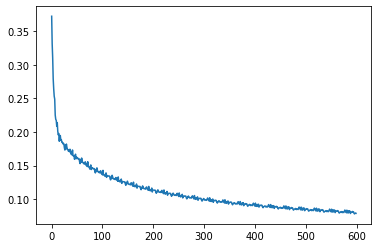

In [5]:
plt.plot(losses)